In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=100, n_features=1, bias=100, noise=10, random_state=42)

In [8]:
class LinearRegression:
    
    def __init__(self, lr=.1, max_iter=20):
        
        self.lr = lr
        self.max_iter = max_iter
        
    def fit(self, X, y):
        self._X = X
        self._y = y.reshape(-1, 1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(self.max_iter):
            self.gradient_dencend()
            errors.append(self.error())
        
        return errors
            
    def gradient_dencend(self):
        
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yp = self.hypothesis(self._X)
        
        d_coef = ((yp - self._y) * self._X).mean()
        d_intercept = ((yp - self._y)).mean()
        
        return d_coef, d_intercept
        
    def hypothesis(self, X):
        return self.coef_ * X + self.intercept_
    
    def predict(self, X):
        return self.hypothesis(X).flatten()
    
    def error(self):
        ya = self._y
        yp = self.hypothesis(self._X)
        
        return ((yp-ya)**2).mean() 

In [10]:
model = LinearRegression(lr=0.1, max_iter=100)
errors = model.fit(X, y)

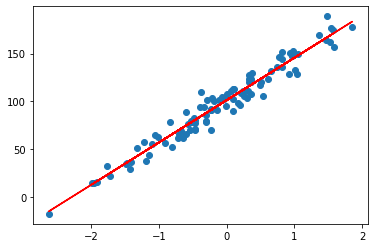

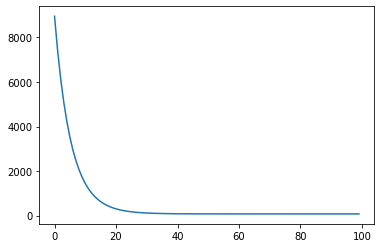

In [12]:
plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X),color="red")
plt.show() 

plt.figure()
plt.plot(errors)
plt.show()